In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import nia22
import cv2
import json

In [3]:
label = np.load('../../RITnet_data/0try/labels/NIA_EYE_U1_053_VR_IR_F_REYE_0901.npy')

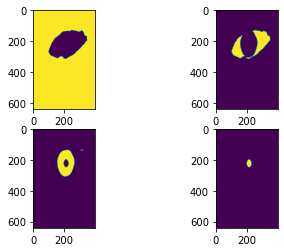

In [4]:
fig, axs = plt.subplots(2,2)
axs = axs.ravel()
axs[0].imshow(label==0)
axs[1].imshow(label==1)
axs[2].imshow(label==2)
axs[3].imshow(label==3)
plt.show()

In [5]:
# Load annotation
ddir = "../../SampleData/"

fn_json = ddir + "json/mobile_C_A_H1_02.json"
fn_png  = fn_json.replace("json", "png")

img = cv2.cvtColor(cv2.imread(fn_png), cv2.COLOR_BGR2RGB)

anno = json.load(open(fn_json))

eye = nia22.eyes.Eye(anno["Annotations"]["image"]["annotations"])

area, cropped = nia22.eyes.crop_eye(img, np.array(eye.l_eyelid['points']))

In [10]:
# Make label map
from nia22.eyes import mask_one_eye

cropped, mask = mask_one_eye(img, eye, "r")

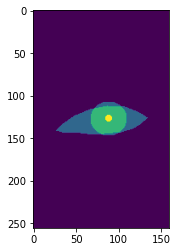

In [11]:
plt.imshow(mask)

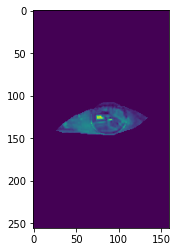

In [12]:
plt.imshow(cropped[:,:,2] * mask)

In [30]:
# train with my new label map 
from glob import glob
import os

In [22]:
flist = glob(ddir+"json/*.json")
flist.sort()

In [38]:
# data dir
dout_dir = "../../dataset_rit_nia/"
os.makedirs(dout_dir, exist_ok=True)

# cropped img 
png_dir = dout_dir+'images/'
os.makedirs(png_dir, exist_ok=True)

# npy label
label_dir = dout_dir+'labels/'
os.makedirs(label_dir, exist_ok=True)

idx=0
for fn_json in flist[2:]:
    fn_png  = fn_json.replace("json", "png")
    fn = fn_json.split("/")[-1].split("json")[0]
    
    #img = cv2.cvtColor(cv2.imread(fn_png), cv2.COLOR_BGR2RGB)
    try:
        img = cv2.imread(fn_png)
        anno = json.load(open(fn_json))
        # temporary version
        eye = nia22.eyes.Eye(anno["annotations"])
        # Final version
        #eye = nia22.eyes.Eye(anno["Annotations"]["image"]["annotations"])
        cropped, mask = mask_one_eye(img, eye, "r")
        cv2.imwrite(png_dir+fn+"r.png", cropped)
        np.save(label_dir+fn+"r.npy",mask)

        cropped, mask = mask_one_eye(img, eye, "l")
        cv2.imwrite(png_dir+fn+"l.png", cropped)
        np.save(label_dir+fn+"l.npy" ,mask)
    except:
        print("error")

error
error
error
error
error
error
error
error
error
error
error


가끔 마스크별로 이미지 크기가 다른 경우가 발생함